In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pwd

In [2]:
def compare_hist(path1, path2):
    with open(os.path.join("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/", path1, "result.pkl"), 'rb') as f:
        result = pickle.load(f)
    all_scores = np.concatenate(result['score'])
    all_labels = np.concatenate(result['label'])
    scores1 = all_scores[all_labels == 1]

    with open(os.path.join("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/", path2, "result.pkl"), 'rb') as f:
        result = pickle.load(f)
    all_scores = np.concatenate(result['score'])
    all_labels = np.concatenate(result['label'])
    scores2 = all_scores[all_labels == 1]

    plt.hist(scores1, 100, label=path1)
    plt.hist(scores2, 100, label=path2)
    plt.legend()

In [ ]:
with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/raw_ae/N01_E1e-01_S10/result.pkl", 'rb') as f:
    result = pickle.load(f)
all_scores = np.concatenate(result['score'])
all_labels = np.concatenate(result['label'])
perturbed_score = all_scores[all_labels == 1]

with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/raw_ae/normal/result.pkl", 'rb') as f:
    result = pickle.load(f)
all_scores = np.concatenate(result['score'])
all_labels = np.concatenate(result['label'])
normal_score = all_scores[all_labels == 1]

In [ ]:
plt.hist(normal_score, 100)
plt.hist(perturbed_score, 100)
plt.show()

In [ ]:
compare_hist("raw_ae/N01_E1e-01_S10", "raw_ae/normal")

In [ ]:
compare_hist("raw_ae/N01_E5e-01_S20_sparse_pos", "raw_ae/normal")

In [ ]:
compare_hist("residual_ae/N01_E5e-01_S20_sparse_pos", "residual_ae/normal")

In [ ]:
compare_hist("residual_ae/N01_E1e-01_S10", "residual_ae/normal")

In [ ]:
def print_precision_recall(file):
    with open(file, 'rb') as f:
        result = pickle.load(f)
    label = np.concatenate([l for l in result['label'] if len(l) == 12])
    pred = np.concatenate([p for p in result['pred'] if len(p) == 12])
    tp = ((label == 1) & (pred == 1)).sum()
    tn = ((label == 0) & (pred == 0)).sum()
    fp = ((label == 0) & (pred == 1)).sum()
    fn = ((label == 1) & (pred == 0)).sum()

    print(f"tp:{tp}, tn:{tn}, fp:{fp}, fn:{fn}")
    print(f"Precision: {tp / (tp + fp)}, Recall: {tp / (tp + fn)}")

In [ ]:
with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/residual_ae/N01_E1e-01_S10/result.pkl", 'rb') as f:
    result = pickle.load(f)
score = np.concatenate(result['score'])
label = np.concatenate([l for l in result['label'] if len(l) == 12])
pred = np.concatenate([p for p in result['pred'] if len(p) == 12])
tp = ((label == 1) & (pred == 1)).sum()
tn = ((label == 0) & (pred == 0)).sum()
fp = ((label == 0) & (pred == 1)).sum()
fn = ((label == 1) & (pred == 0)).sum()

print(f"tp:{tp}, tn:{tn}, fp:{fp}, fn:{fn}")
print(f"Precision: {tp / (tp + fp)}, Recall: {tp / (tp + fn)}")


In [ ]:
print_precision_recall("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/multi-test/N01_E1e-01_S10/result.pkl")

In [ ]:

print_precision_recall("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost_v2/N01_E1e-01_S10/result.pkl")

In [ ]:
print_precision_recall("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/residual_ae_v0/N01_E1e-01_S10/result.pkl")

In [ ]:
print_precision_recall("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/raw_ae/N01_E1e-01_S10/result.pkl")

In [ ]:
lenth_set = {}
for s in result['score']:
    lenth_set[len(s)] = 1
print(lenth_set)

residual_ae use 2, 3 agent scenes in test set as calibration set

In [ ]:
with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/residual_ae/no_attack/result.pkl", 'rb') as f:
    result = pickle.load(f)
calibration_score = np.concatenate([s for s in result['score'] if len(s) != 12])
threshold = np.percentile(calibration_score, 95)

with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/residual_ae/N01_E1e-01_S10/result.pkl", 'rb') as f:
    result = pickle.load(f)
score = np.concatenate([s for s in result['score'] if len(s) == 12])
label = np.concatenate([l for l in result['label'] if len(l) == 12])
# score = np.concatenate(result['score'])
# label = np.concatenate(result['label'])
# pred = np.concatenate([p for p in result['pred'] if len(p) == 12])
pred = score > threshold
tp = ((label == 1) & (pred == 1)).sum()
tn = ((label == 0) & (pred == 0)).sum()
fp = ((label == 0) & (pred == 1)).sum()
fn = ((label == 1) & (pred == 0)).sum()

print(f"tp:{tp}, tn:{tn}, fp:{fp}, fn:{fn}")
print(f"Precision: {tp / (tp + fp + 1e-7)}, Recall: {tp / (tp + fn + 1e-7)}")

In [ ]:
np.save("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/mreconstruction_loss_validation_v2.npy", calibration_score)

raw_ae use 2, 3 agent scenes in test set as calibration set

In [ ]:
with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/raw_ae/no_attack/result.pkl", 'rb') as f:
    result = pickle.load(f)
calibration_score = np.concatenate([s for s in result['score'] if len(s) != 12])
threshold = np.percentile(calibration_score, 95)

with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/raw_ae/N01_E1e-01_S10/result.pkl", 'rb') as f:
    result = pickle.load(f)
score = np.concatenate([s for s in result['score'] if len(s) == 12])
label = np.concatenate([l for l in result['label'] if len(l) == 12])
# score = np.concatenate(result['score'])
# label = np.concatenate(result['label'])
# pred = np.concatenate([p for p in result['pred'] if len(p) == 12])
pred = score > threshold
tp = ((label == 1) & (pred == 1)).sum()
tn = ((label == 0) & (pred == 0)).sum()
fp = ((label == 0) & (pred == 1)).sum()
fn = ((label == 1) & (pred == 0)).sum()

print(f"tp:{tp}, tn:{tn}, fp:{fp}, fn:{fn}")
print(f"Precision: {tp / (tp + fp + 1e-7)}, Recall: {tp / (tp + fn + 1e-7)}")
np.save("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/mreconstruction_loss_validation_raw.npy", score)

In [ ]:
train = np.load("/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/autoencoder_residual/reconstruction_losses_residual_train.npy")
cal = np.load("/DB/data/yanghengzhao/adversarial/DAMC/zhenxiang/autoencoder_residual/reconstruction_losses_residual.npy")
plt.hist(train, bins=100, label='train')
plt.hist(cal, bins=50, label='calibration')
plt.legend()
plt.show()

## attacker detection and AP analysis

In [3]:
with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost_v2/N01_E1e-01_S10/result.pkl", 'rb') as f:
    mc_result = pickle.load(f)

with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/multi-test-v2/N01_E1e-01_S10/result.pkl", 'rb') as f:
    mt_result = pickle.load(f)

with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost/N01_E1e-01_S10/AP05.pkl", 'rb') as f:
    aps = pickle.load(f)

In [4]:
mc_pred = np.concatenate([p for p in mc_result['pred'] if len(p) == 12])
mc_score = np.concatenate([s for s in mc_result['score'] if len(s) == 12])
mt_pred = np.concatenate([p for p in mt_result['pred'] if len(p) == 12])
label = np.concatenate([l for l in mc_result['label'] if len(l) == 12])

In [5]:
mc_calibration_set = np.load("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/match_costs_validation.npy")
threshold = np.percentile(mc_calibration_set, 95)
pred = mc_score > threshold

tp = ((label == 1) & (pred == 1)).sum()
tn = ((label == 0) & (pred == 0)).sum()
fp = ((label == 0) & (pred == 1)).sum()
fn = ((label == 1) & (pred == 0)).sum()

print(f"tp:{tp}, tn:{tn}, fp:{fp}, fn:{fn}")
print(f"Precision: {tp / (tp + fp + 1e-7)}, Recall: {tp / (tp + fn + 1e-7)}")

tp:1091, tn:2121, fp:279, fn:109
Precision: 0.7963503649053758, Recall: 0.9091666665909027


In [4]:
agent4_aps = aps['agent4_APs']
all_aps = aps['all_APs']

In [5]:
# aps = agent4_aps[0]
single_APs = []
fused_APs = []
for aps in agent4_aps:
    num_agent = len(aps)
    single_ap = np.array(aps[0])
    single_ap = np.concatenate([single_ap for _ in range(num_agent-1)])
    fused_ap = np.array(aps[1:])
    fused_ap = fused_ap.flatten()
    single_APs.append(single_ap)
    fused_APs.append(fused_ap)
# print(single_ap)
# print(fused_ap)
single_APs = np.concatenate(single_APs)
fused_APs = np.concatenate(fused_APs)

In [12]:
relabel = (single_APs - fused_APs > 0.05) & (label == 1)

In [13]:
tp = ((relabel == 1) & (mc_pred == 1)).sum()
tn = ((relabel == 0) & (mc_pred == 0)).sum()
fp = ((relabel == 0) & (mc_pred == 1)).sum()
fn = ((relabel == 1) & (mc_pred == 0)).sum()

print(f"tp:{tp}, tn:{tn}, fp:{fp}, fn:{fn}")
print(f"Precision: {tp / (tp + fp + 1e-7)}, Recall: {tp / (tp + fn + 1e-7)}")

tp:911, tn:2358, fp:300, fn:31
Precision: 0.7522708504746266, Recall: 0.9670912950141093


In [14]:
tp = ((relabel == 1) & (mt_pred == 1)).sum()
tn = ((relabel == 0) & (mt_pred == 0)).sum()
fp = ((relabel == 0) & (mt_pred == 1)).sum()
fn = ((relabel == 1) & (mt_pred == 0)).sum()

print(f"tp:{tp}, tn:{tn}, fp:{fp}, fn:{fn}")
print(f"Precision: {tp / (tp + fp + 1e-7)}, Recall: {tp / (tp + fn + 1e-7)}")

tp:915, tn:2374, fp:284, fn:27
Precision: 0.7631359465585374, Recall: 0.97133757951472


In [ ]:
len(mc_pred)

In [ ]:
((single_APs < fused_APs) & (label == 1)).sum()

In [ ]:
mc_pred[(single_APs < fused_APs) & (label == 1)].sum()

In [ ]:
mt_pred[(single_APs < fused_APs) & (label == 1)].sum()

## ROC curve of multi-test

In [10]:
# load score
with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/multi-test-raev2/N01_E1e-01_S10/result.pkl", 'rb') as f:
    result = pickle.load(f)

score = np.concatenate([s for s in result['score'] if len(s) == 12])
label = np.concatenate([l for l in result['label'] if len(l) == 12])
pred = np.concatenate([p for p in result['pred'] if len(p) == 12])


In [12]:
# BH procedure
import sys
sys.path.append("../")
from utils.bh_procedure import BH
sys.path.pop()

dists = []
dists.append(np.load("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/match_costs_validation.npy"))
dists.append(np.load("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/mreconstruction_loss_validation_v2.npy"))

bh_test = BH(dists, 0.05)
is_attacker = []
for s in score:
    rejected = bh_test.test(s)
    if len(rejected) > 0:
        is_attacker.append(1)
    else:
        is_attacker.append(0)

is_attacker = np.array(is_attacker, dtype=np.int64)

/GPFS/data/yanghengzhao/point/env/disco/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [78]:
def multi_test(dists, fdr, label, score):
    bh_test = BH(dists, fdr)
    is_attacker = []
    for s in score:
        rejected = bh_test.test(s)
        if len(rejected) > 0:
            is_attacker.append(1)
        else:
            is_attacker.append(0)
    is_attacker = np.array(is_attacker, dtype=np.int64)
    pred = is_attacker
    
    tp = ((label == 1) & (pred == 1)).sum()
    tn = ((label == 0) & (pred == 0)).sum()
    fp = ((label == 0) & (pred == 1)).sum()
    fn = ((label == 1) & (pred == 0)).sum()
    tpr = tp / (tp + fn + 1e-7)
    fpr = fp / (fp + tn + 1e-7)
    return tpr, fpr

In [42]:
tprs = []
fprs = []

for fdr in np.linspace(0, 2.2, 200):
    tpr, fpr = multi_test(dists, fdr)
    # print(f"fdr:{fdr}, tpr:{tpr}, fpr:{fpr}")
    tprs.append(tpr)
    fprs.append(fpr)
tprs = np.array(tprs)
fprs = np.array(fprs)

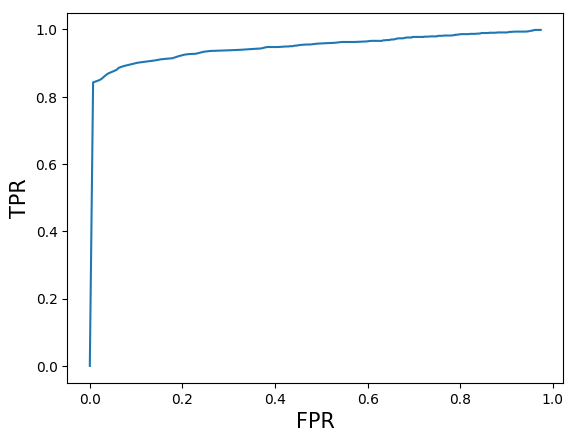

In [43]:
plt.plot(fprs, tprs)
plt.xlabel("FPR",fontsize=15)
plt.ylabel("TPR",fontsize=15)
plt.show()

## ROC curve of match cost

In [21]:
# load score
with open("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost_v2/N01_E1e-01_S10/result.pkl", 'rb') as f:
    result = pickle.load(f)

mc_score = np.concatenate([s for s in result['score'] if len(s) == 12])
mc_label = np.concatenate([l for l in result['label'] if len(l) == 12])
mc_pred = np.concatenate([p for p in result['pred'] if len(p) == 12])

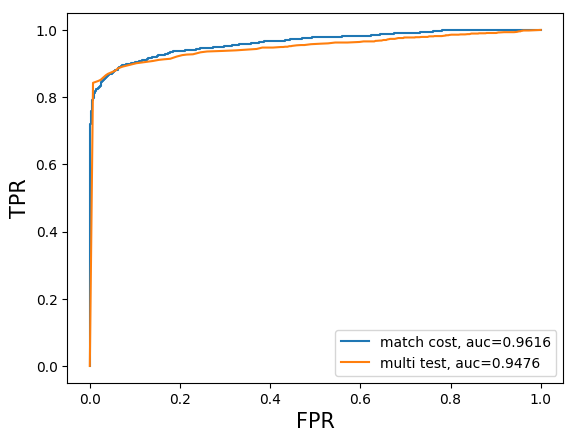

In [53]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(mc_label, mc_score)
# auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"match cost, auc={metrics.auc(fpr, tpr):.04f}")
plt.plot(fprs, tprs, label=f"multi test, auc={metrics.auc(fprs, tprs):.04f}")
plt.xlabel("FPR",fontsize=15)
plt.ylabel("TPR",fontsize=15)
plt.legend()
plt.show()

In [45]:
metrics.auc(fpr, tpr)

0.9616149305555556

In [51]:
metrics.auc(fprs, tprs)

0.9476243054798281

In [50]:
tprs = np.r_[tprs, 1.0]
fprs = np.r_[fprs, 1.0]

In [54]:
from sklearn import metrics

In [91]:
def roc_compare(mc_file, mt_file, ap_file=None):
    with open(mc_file, 'rb') as f:
        result = pickle.load(f)
    mc_score = np.concatenate([s for s in result['score'] if len(s) == 12])
    mc_label = np.concatenate([l for l in result['label'] if len(l) == 12])
    mc_pred = np.concatenate([p for p in result['pred'] if len(p) == 12])
    
    with open(mt_file, 'rb') as f:
        result = pickle.load(f)
    mt_score = np.concatenate([s for s in result['score'] if len(s) == 12])
    mt_label = np.concatenate([l for l in result['label'] if len(l) == 12])
    mt_pred = np.concatenate([p for p in result['pred'] if len(p) == 12])
    
    assert np.all(mc_label == mt_label)

    label = mc_label
    if ap_file is not None:
        with open(ap_file, 'rb') as f:
            aps = pickle.load(f)
        agent4_aps = aps['agent4_APs']

        single_APs = []
        fused_APs = []
        for aps in agent4_aps:
            num_agent = len(aps)
            single_ap = np.array(aps[0])
            single_ap = np.concatenate([single_ap for _ in range(num_agent-1)])
            fused_ap = np.array(aps[1:])
            fused_ap = fused_ap.flatten()
            single_APs.append(single_ap)
            fused_APs.append(fused_ap)
        single_APs = np.concatenate(single_APs)
        fused_APs = np.concatenate(fused_APs)

        relabel = (single_APs - fused_APs > 0.05) & (label == 1)
        label = relabel
    
    fpr, tpr, thresholds = metrics.roc_curve(label, mc_score)
    plt.plot(fpr, tpr, label=f"match cost, auc={metrics.auc(fpr, tpr):.04f}")
    
    tprs = []
    fprs = []    
    for fdr in np.linspace(0, 2.2, 2000):
        tpr, fpr = multi_test(dists, fdr, label, mt_score)
        tprs.append(tpr)
        fprs.append(fpr)
    tprs = np.array(tprs)
    fprs = np.array(fprs)
    tprs = np.r_[tprs, 1.0]
    fprs = np.r_[fprs, 1.0]
    plt.plot(fprs, tprs, label=f"multi test, auc={metrics.auc(fprs, tprs):.04f}")
    
    plt.xlabel("FPR",fontsize=15)
    plt.ylabel("TPR",fontsize=15)
    plt.legend()
    plt.show()
    return tprs, fprs

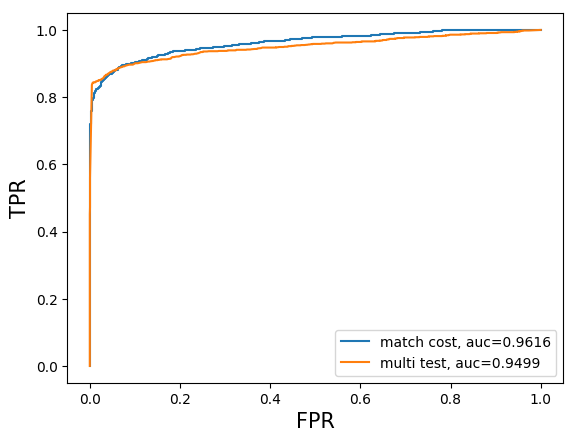

In [71]:
_ = roc_compare("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost_v2/N01_E1e-01_S10/result.pkl",
"/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/multi-test-raev2/N01_E1e-01_S10/result.pkl")

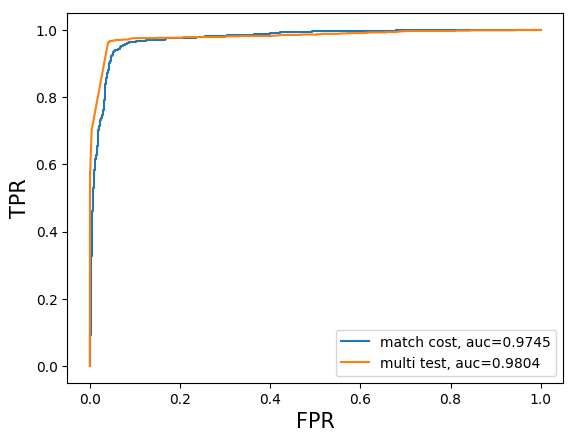

In [72]:
tprs, fprs = roc_compare("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost_v2/N01_E1e-01_S10/result.pkl",
"/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/multi-test-raev2/N01_E1e-01_S10/result.pkl",
"/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/save_11_bboxes/N01_E1e-01_S10/AP05.pkl")

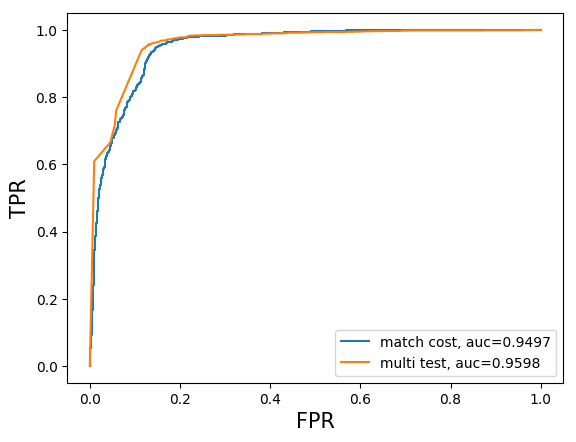

In [92]:
tprs, fprs = roc_compare("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost_v2/non-collaborative/N02_E1e-01_S10/result.pkl",
"/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/multi-test-raev2/non-collaborative/N02_E1e-01_S10/result.pkl",
"/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/save_11_bboxes/non-collaborative/N02_E1e-01_S10/AP05.pkl")

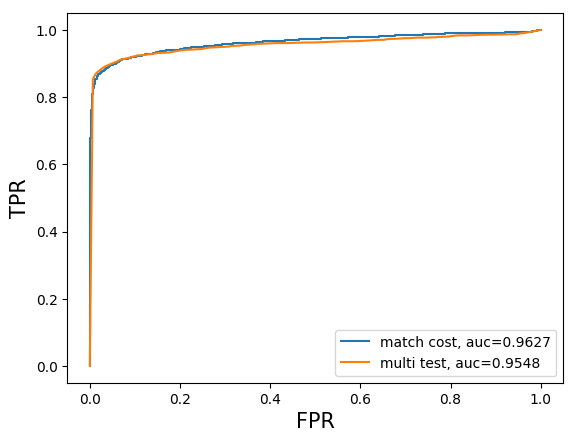

In [80]:
tprs, fprs = roc_compare("/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/match_cost_v2/non-collaborative/N02_E1e-01_S10/result.pkl",
"/DB/data/yanghengzhao/adversarial/DAMC/yanghengzhao/disco-net/experiments/multi-test-raev2/non-collaborative/N02_E1e-01_S10/result.pkl")

In [69]:
metrics.auc(fprs, tprs)

0.9803507497074584

In [1]:
# psudo code for calculate precision and recall
import numpy as np

score = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])  # match cost, reconstruction loss, etc
label = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
threshold = 0.75
pred = score > threshold  # for multi-test, use the rejection directly

tp = ((label == 1) & (pred == 1)).sum()
tn = ((label == 0) & (pred == 0)).sum()
fp = ((label == 0) & (pred == 1)).sum()
fn = ((label == 1) & (pred == 0)).sum()
print(f"Precision: {tp / (tp + fp + 1e-7):.04f}\n")
print(f"Recall: {tp / (tp + fn + 1e-7):.04f}\n")

Precision: 1.0000

Recall: 0.4000

